In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 3.1 비지도 학습의 종류

1. **비지도 변환**은 데이터를 새혹세 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘입니다.  
    -> 차원축소 : 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법  

    ex) 시각화를 위해 dataset을 2차원으로 변경하는 경우  
    -> 소셜 미디어에서 선거, 총기 규제, 팝스타와 같은 주제로 일어나는 토론을 추적할 때 사용  
    
    
2. **군집 알고리즘**은 데이터를 비슷한 것끼리 그룹으로 묶는 것입니다.

# 3.3 데이터 전처리와 스케일 조정

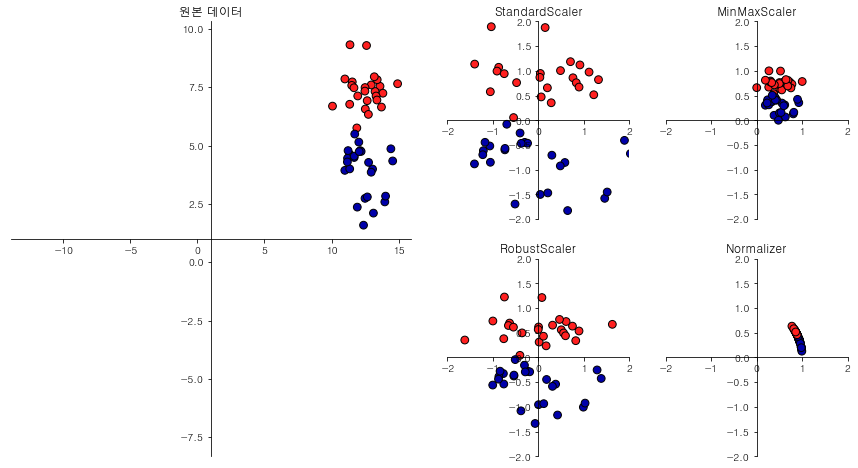

In [2]:
mglearn.plots.plot_scaling()

1. 왼쪽 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋  
    - 첫 번째 특성(x축의 값) : 10과 15 사이  
    - 두 번째 특성(y축의 값) : 1과 9 사이  
2. 오른쪽 그래프 4개는 데이터를 기준이 되는 범위로 변환하는 방법
    - StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 합니다.  
    - RobustScaler는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷하지만  
      평균과 분산 대신 **중간 값과 사분위 값**을 사용합니다.  
      (이상치에 영향을 받지 않음)
    - MinMaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경합니다. (x축, y축 모두)
    - Normalizer는 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정합니다. (원점에서 길이가 모두 1)  
      (특성 벡터의 길이는 상관없고 **방향 또는 각도**만이 중요할 때 많이 사용)

## 3.3.2 데이터 변환 적용하기

cancer dataset에 커널 SVM(SVC)을 적용하고 데이터 전처리에는 MinMaxScaler를 사용한 예제

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MinMaxScaler의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산합니다.

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

새로운 데이터 표현을 만들 때 사용하는 메서드 transform을 사용하여 실제 훈련 데이터의 스케일을 조정

In [6]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 dataset의 속성을 출력합니다.
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값 :\n", X_train.min(axis = 0))
print("스케일 조정 전 특성별 최댓값 :\n", X_train.max(axis = 0))
print("스케일 조정 후 특성별 최솟값 :\n", X_train_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최댓값 :\n", X_train_scaled.max(axis = 0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최솟값 :
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최댓값 :
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최솟값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최솟값 :\n", X_test_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최댓값 :\n", X_test_scaled.max(axis = 0))

스케일 조정 후 특성별 최솟값 :
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최댓값 :
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


스케일을 조정한 테스트 세트의 최솟값과 최댓값은 0과 1이 아니고 벗어난 것도 있습니다.  
MinMaxScaler는 (다른 모든 스케일 모델도) 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 합니다.  
transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고 항상 **훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눕니다.**

## 3.3.3 Quantile Transformer와 PowerTransfomer

Quantile Transformer는 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포시킵니다.  
RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축합니다.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

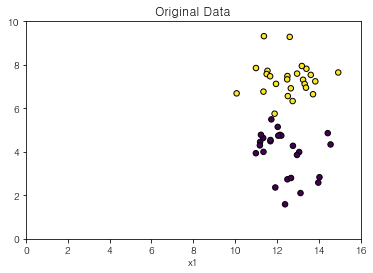

In [9]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.xlabel('x1')
plt.title("Original Data")
plt.show();

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


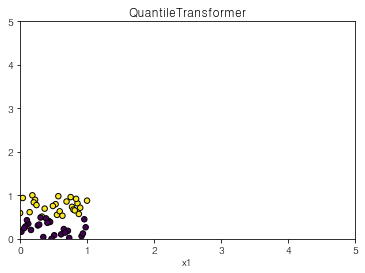

In [10]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.xlabel('x1')
plt.title(type(scaler).__name__)
plt.show();

랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1 사이에 고르게 분포되어 있습니다.

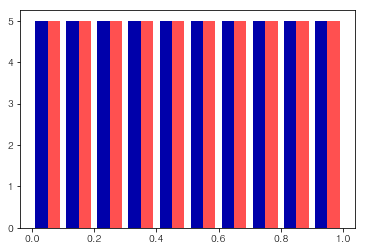

In [11]:
plt.hist(X_trans)
plt.show();

QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본 값은 1,000입니다.

In [12]:
print(scaler.quantiles_.shape)

(50, 2)


첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정

In [13]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [14]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등분포가 아닌 **정규분포**로 출력을 바꿀 수 있습니다.

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


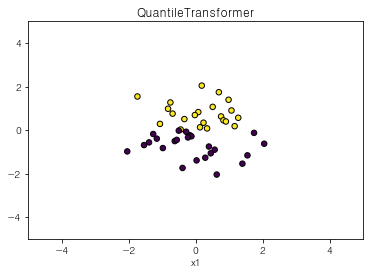

In [15]:
scaler = QuantileTransformer(output_distribution = 'normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.xlabel('x1')
plt.title(type(scaler).__name__)
plt.show();

PowerTransformer은 method 매개변수에 'yeo-johnson'와 'box-cox' 알고리즘을 지정할 수 있고 기본값은 'yeo-johnson'입니다.

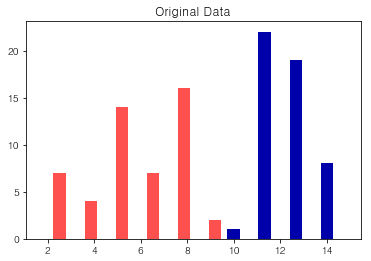

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


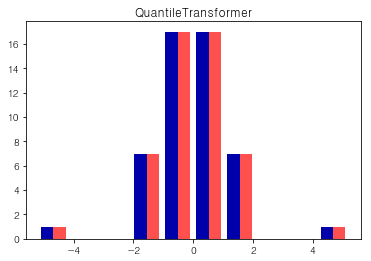

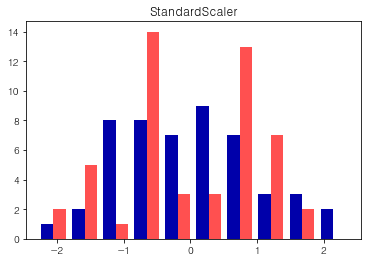

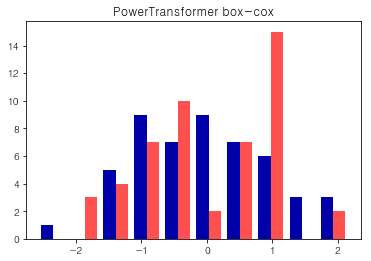

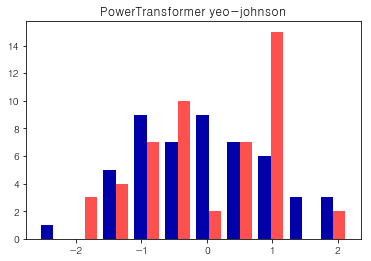

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show();

X_trans = QuantileTransformer(output_distribution = 'normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show();

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show();

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show();

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show();

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

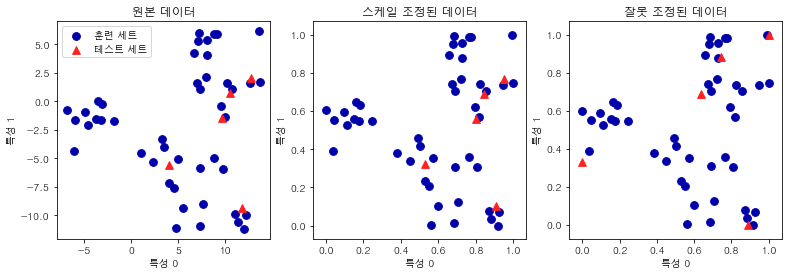

In [17]:
from sklearn.datasets import make_blobs
# 인위적인 dataset 생성
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('원본 데이터')

# MinMaxScaler를 사용해 스케일을 조정합니다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[1].set_title('스케일 조정된 데이터')

# 테스트 세트의 스케일을 따로 조정합니다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^',
                c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[2].set_title('잘못 조정된 데이터')

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

1. 첫 번째 그래프는 2차원 원본 dataset  
2. 두 번째 그래프는 같은 데이터를 MinMaxScaler로 스케일을 조정한 것입니다. (첫 번째 그래프에서 축의 눈금만 바뀜)  
    - 테스트 데이터의 최솟값과 최댓값은 0과 1이 아닙니다.
3. 세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정
    - 테스트 데이터의 최솟갑과 최댓값이 모두 0과 1입니다.
    - 테스트 포인트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동했습니다.

#### 단축 메서드와 효율적인 방법

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효과적입니다.
X_scaled_d = scaler.fit_transform(X_train)

fit_transform이 모든 모델에서 효율이 좋은 것은 아니지만, 훈련 세트 변환에 이 메서드를 사용하는 것은 좋은 습관입니다.

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C = 100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.63


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM 테스트 정확도 : 0.96


# 3.4 차원 축소, 특성 추출, 매니폴드 학습

## 3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 dataset을 회전시키는 기술입니다.

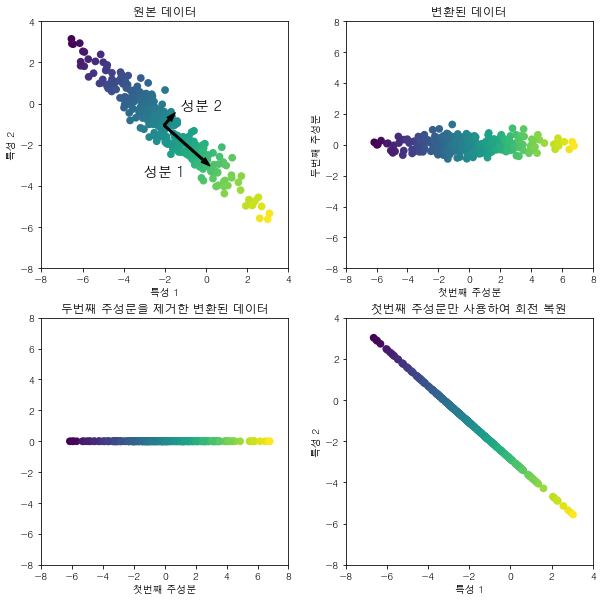

In [22]:
mglearn.plots.plot_pca_illustration()

1. 첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시한 것입니다.
    - '성분 1'이라고 쓰여 있는 분산이 가장 큰 방향을 찾습니다.  
      이 방향은 데이터에서 가장 많은 정보를 담고 있는 방향(특성들의 상관관계가 가장 큰 방향)입니다.  
    - 그 다음으로 첫 번째 방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾습니다.  
    
-> 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 합니다.  
    (일반적으로 원본 특성 갯수만큼의 주성분이 있습니다.)  

2. 두 번째 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것입니다.  
    - 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄습니다.  
    - PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됩니다.  
3. 세 번째 그래프는 주성분의 일부만 남기는 차원 축소 용도로 PCA를 사용했습니다.
    - 2차원 dataset에서 1차원 dataset으로 차원이 감소합니다.  
    (가장 유용한 방향을 찾아서 그 방향의 성분은 유지하는 것입니다.)  
4. 네 번째 그래프는 데이터에 다시 평균을 더하고 반대로 회전시킵니다.
    - 원래 특성 공간에서 첫 번째 주성분의 정보만 담고 있습니다.

### PCA를 적용해 유방암 dataset 시각화하기

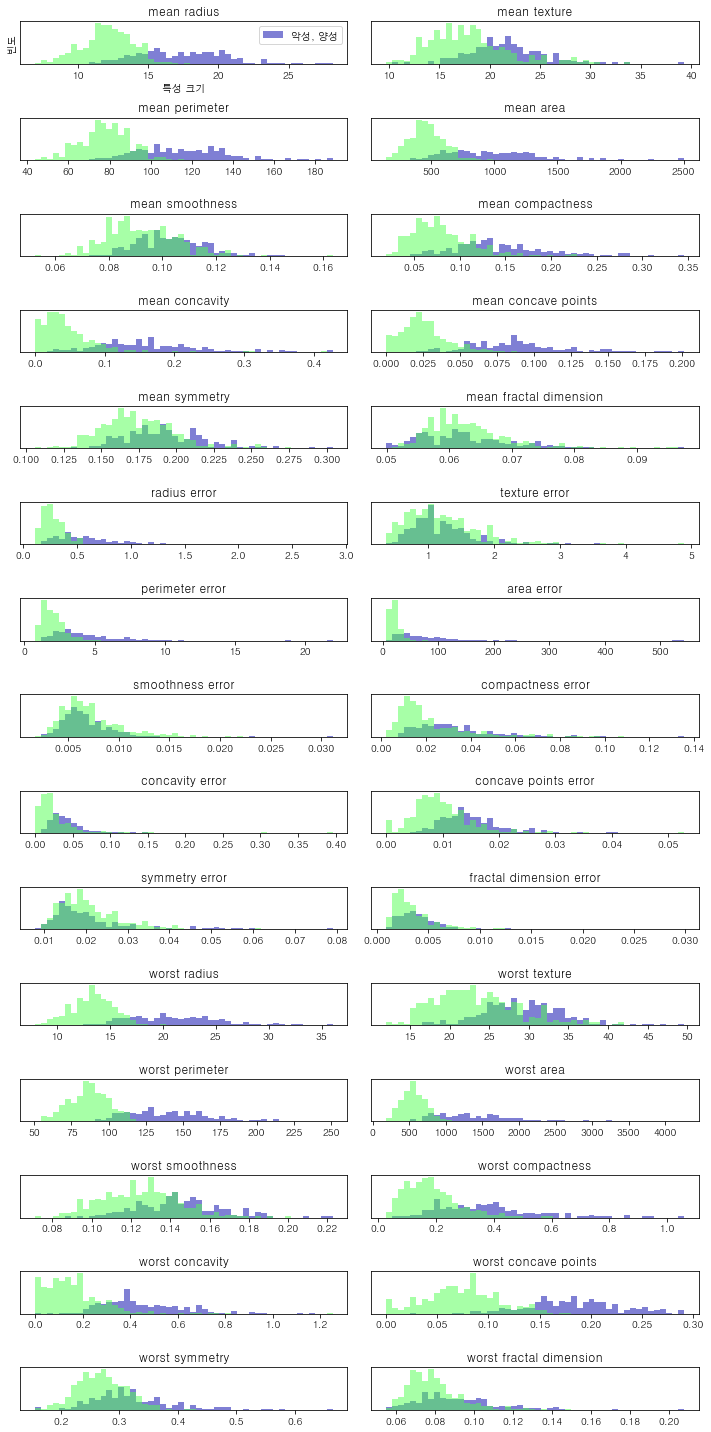

In [23]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성, 양성'], loc = 'best')
fig.tight_layout();

초록색은 양성 클래스, 푸른색은 악성 클래스를 나타냅니다.

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [25]:
from sklearn.decomposition import PCA

# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components = 2)

# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 :", str(X_scaled.shape))
print("축소된 데이터 형태 :", str(X_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


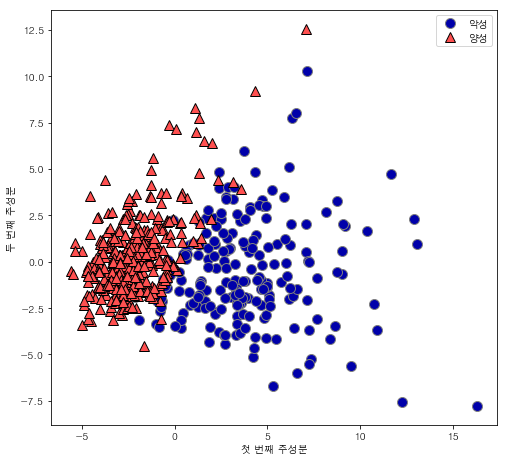

In [26]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

**PCA의 단점**은 그래프의 두 축을 해석하기가 쉽지 않다는 점입니다.  
주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태입니다.  
PCA 객체가 학습될 때 components_ 속성에 주성분이 저장됩니다.

In [27]:
print(" PCA 주성분 형태 :", pca.components_.shape)

 PCA 주성분 형태 : (2, 30)


In [28]:
print(" PCA 주성분 :\n", pca.components_)

 PCA 주성분 :
 [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


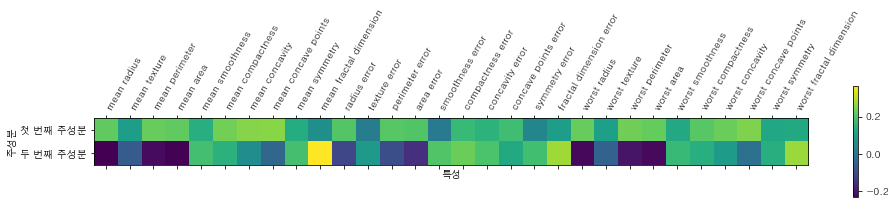

In [29]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분');

### 고유얼굴(eigenface) 특성 추출

PCA를 이용하여 LFW dataset의 얼굴 이미지에서 특성을 추출하는 간단한 어플리케이션

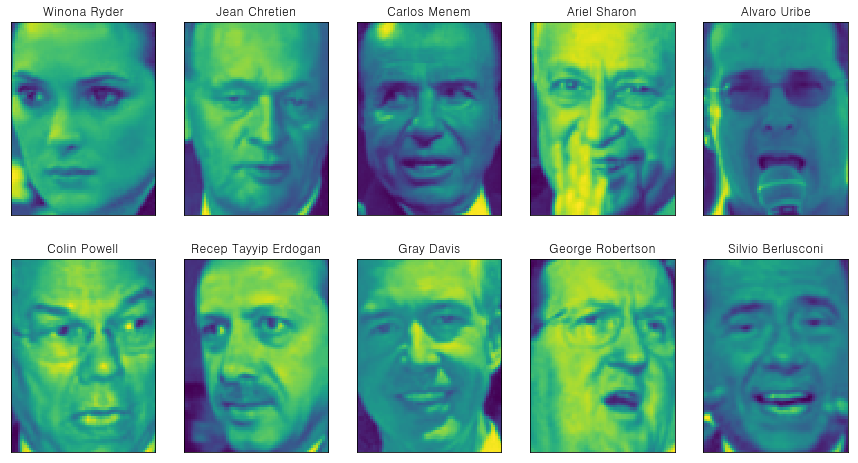

In [30]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target]);

LFW dataset에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87x65픽셀입니다.

In [31]:
print("people.images.shape :", people.images.shape)
print("클래스 갯수 :", len(people.target_names))

people.images.shape : (3023, 87, 65)
클래스 갯수 : 62


In [32]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:#3}".format(name, count), end = '    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

데이터의 편중을 없애기 위해 사람마다 50개의 이미지만 선택

In [33]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

# 이웃의 갯수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정합니다.  
(화이트닝 옵션 없이 변환한 후에 StandardScaler 를 적용하는 것과 같읍)

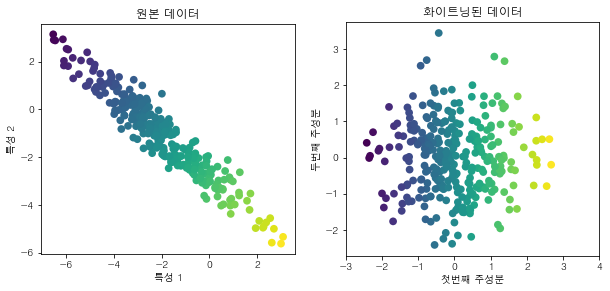

In [36]:
mglearn.plots.plot_pca_whitening()

In [38]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape :", X_train_pca.shape)

X_train_pca.shape : (1547, 100)


In [41]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도 : 0.31


In [42]:
print("pca.components_.shape :", pca.components_.shape)

pca.components_.shape : (100, 5655)


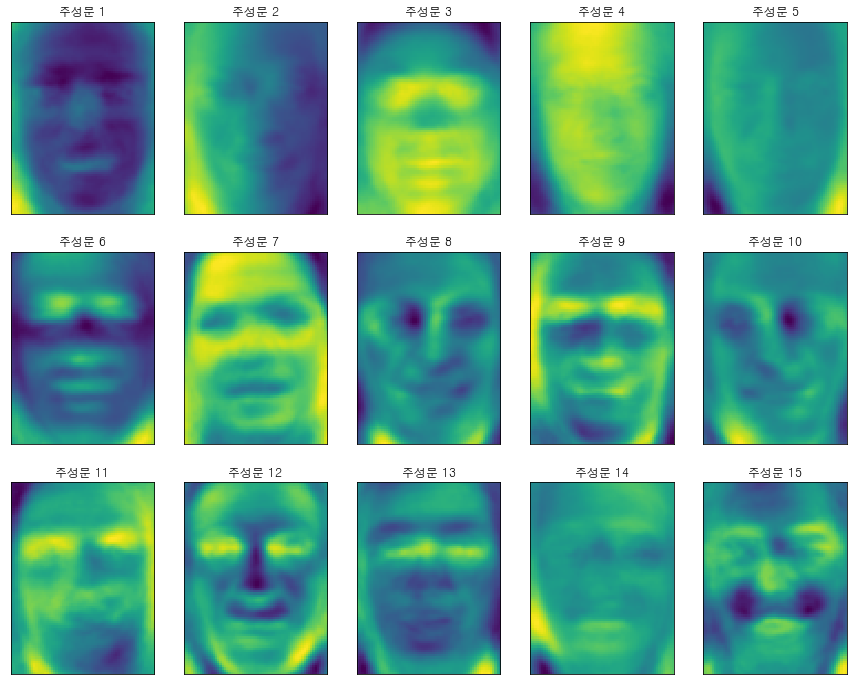

In [43]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax)in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i + 1)));

첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이고, 두 번째 주성분은 오른쪽과 왼쪽의 조명의 차이를 담고 있는 것 등  
몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있습니다.

몇 개의 주성분으로 데이터를 줄이고 원래 특성 공간으로 되돌리는 작업은 inverse_transform 메서드를 사용합니다.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 8.7s, 0.1min


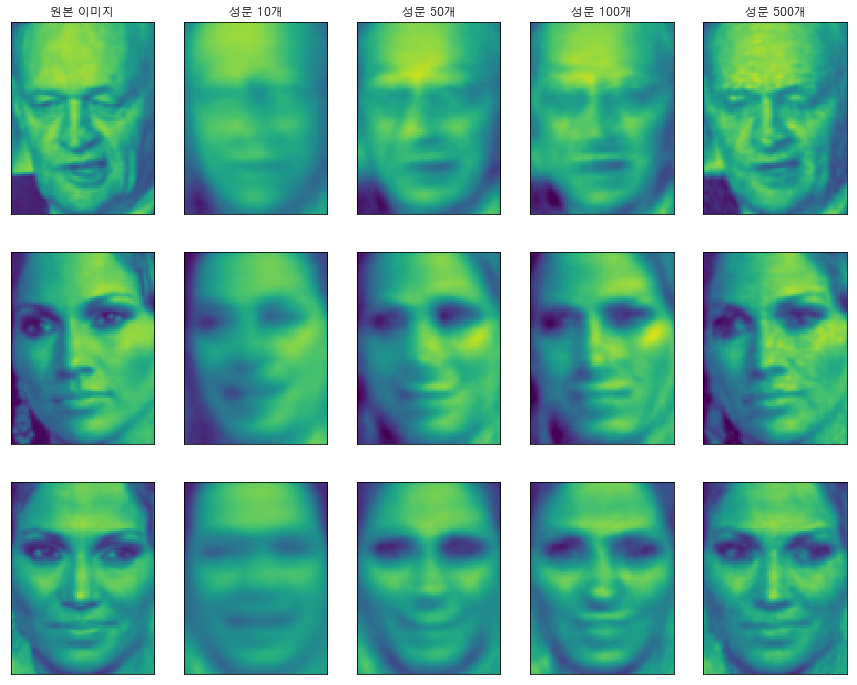

In [46]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 클래스로 구분해 산점도로 나타냈습니다.

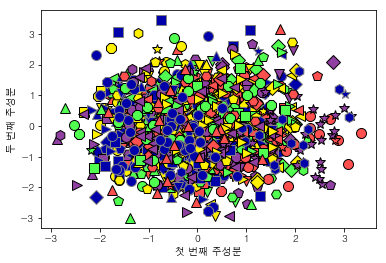

In [47]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

## 3.4.2 비음수 행렬 분해(NMF)

NMF(non-negative matrix factorization)는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘입니다.  
PCA와 비슷하고 차원 축소에도 사용할 수 있습니다.  
**but!** PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾습니다.  
-> 주성분과 계수가 모두 0보다 크거나 같아야 합니다.

### 인위적 데이터에 NMF 적용하기

PCA를 사용할 때와 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 합니다.

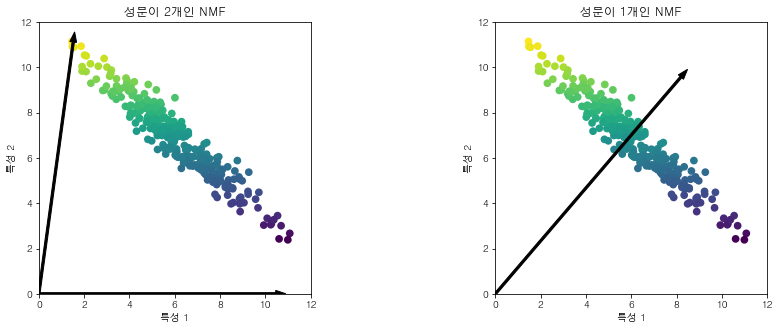

In [48]:
mglearn.plots.plot_nmf_illustration()

- 왼쪽은 성분이 둘인 NMF로, dataset의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있습니다.  
    (데이터가 특성 갯수만큼 많다면 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것입니다.)
- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듭니다.  
    (PCA와는 반대로 성분 갯수를 줄이면 특정 방향이 제거되는 것뿐만이 아니라 전체 성분이 완전히 바뀝니다.)
- NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라집니다.

### 얼굴 이미지에 NMF 적용하기

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


- 변환을 되돌린 결과는 PCA를 사용했을 때와 비슷하지만 품질이 떨어집니다.  
     (PCA가 재구성 측면에서 최선의 방향을 찾기 때문!!)
- NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용합니다.

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax)in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('성분 {}'.format((i)));